### Timorco
#### Eduardo Vaca A01207563
#### Raúl Mar A00512318
#### Javier Rodríguez A01152572
# Exponential distribution(Epidemiology)

### Introduction
        Virus and diseases are big issue for public health because of their ability to propagate and infect new hosts, in order to prevent a rapid expansion and to give the scientist and researchers a leverage against these entities, the field of Continuos Event System simulation comes in. We could define a simulation as "the imitation of the operation of a real-world process or system over time."[1]
    
        For this project TIMORCO simulated the evolution of 2 diferent Virus strains: The ebola virus which was known for being a quickly expanding epidemia which started in Guinnea and quickly moved to the neighbor countries such as Sierra Leone and Liberia. The second simulation was done on the normal flu which currently kills arround
    375,000 people per year, giving us two great test cases for our reasearch.
    
   

# Methodology
    In order to simulate the virus transmision process we first defined two hosts:
         1. People from 20 to 40 years old
         2. Babies from 0 to 5 years old, this group is more susceptible to get sick and die
    
    Also as we previously mentioned two virus strains were modeled:
         1. Agressive dissease, simmulating ebola
         2. Soft dissease, simmulating a normal flu
    
    The virus lifecycle goes through these 3 following states:
        ![process][img/process.png]
    
    On which we looked for the number of individuals which were the most succeptible to catch the virus and we used the following time based equation for each of the strains to calculate it:
        ![succeptible][img/succeptible.png]
     
    Also the current infected population was analyzed:
        ![infected][img/infected.png]
    
    Finally we calculated the recovered users over time. and this was used to figure out the succeptibility of the users to catch the virus again.
       ![recovered][img/recovered.png]
 
       
     In order to calculate this we first need to calculate the growth rate(GH) of each of the strains which follow an exponential distribution
        

In [1]:
# number of hosts
N_H = 2
# number of virus strains
N_V = 2

 ### Generate probability of mortality for the different type of hosts and strains
 We set the values depending on the host group and virus strain (one strain is more aggressive than the other)
 #### Where:
     *MU represents the mortality probability of each of the strains
     *BETA represents the probability of catching the virus
     *RO represents the probability of catching the virus again after being already infected, which is also a transistion state between recovered and succeptible
     *GAMMA is the probability of recovering from the virus.


In [2]:
import random
# def no_mortality_prob():
#     return [random.uniform(0,1) for _ in range(N_H)]

# def virus_host_prob():
#     return [[random.uniform(0,1) for _ in range(N_V)] for _ in range(N_H)]

# MU = no_mortality_prob()
MU = [0.90, 0.10] # no mortality probability

# BETA = virus_host_prob()
BETA = [[0.6, 0.3], [0.9, 0.05]] # probability of catching the virus
# print(BETA)
# RO = virus_host_prob()
RO = [[0.75, 0.15], [0.95, 0.5]] # probability of catching the virus again after being already infected

# GAMMA = virus_host_prob()
GAMMA = [[0.90, 0.70], [0.1, 0.4]] # probability of getting better

### Define r_h
R_H is a factor that changes the population's growth rate

In [3]:
R_H = random.uniform(1, 5)
R_H

3.485183155103463

### Define P_S
P_S is a constant which defines the total size of the population on which the simulation will be run.

In [4]:
P_S = 300
P_S

300

### Set C_H

In [5]:
C_H = random.randint(P_S, P_S + 100)
C_H

324

### Define population growth functions
For each of the host we define a different growth function to analize a different behaviour for each of the virus strains

    To make the work easier an exponential calculus function which allowed us to retrieve the probability value of MU, RO, and GAMMA whenever needed.
    
    A recurent function was defined for NH that is used to calculate the growth rate which needs its previous time. This time is initialy Nh(0).
    
    Now that we have Nh and exponential of MU we can easiy calculate the growth speed for each of the strains on a time basis.

In [6]:
import math

def get_exp_m(m, host_index, virus_index):
    """
    Helper function for computing the exponential of
    probability value
    PARAMS:
    m: type of matrix to compute the exponentiation
    host_index: index of the host group
    virus_index: index of the virus strain
    RETURNS:
    exponentiation of the probability
    """
    return math.exp(-m[host_index][virus_index])

def get_nh(h_index, t):
    """
    Computes the Nh factor
    PARAMS:
    h_index: index of the host group
    t: current timestep
    RETURNS:
    Nh factor
    """
    def get_nh_recur(current_t):
        if current_t == 0:
            return P_S
        else:
            nh_past_times_exp = math.exp(-MU[h_index]) * get_nh_recur(current_t - 1)
            return R_H * nh_past_times_exp * (1 - (nh_past_times_exp / C_H)) + nh_past_times_exp

    if h_index == 0:
        return get_nh_recur(t)
    else:
        return P_S

def get_gh(h_i, t):
    """
    Computes the Gh factor
    PARAMS:
    h_i: index of the host group
    t: current timestep
    RETURNS:
    Gh factor
    """    
    nh = get_nh(h_i, t)
    if h_i == 0:
        return R_H * math.exp(-MU[h_i]) * nh * (1 - (math.exp(-MU[h_i]) * nh)/C_H)
    else:
        return (1 - math.exp(-MU[h_i])) * nh
        
    

In [7]:
PAST_R = [[{} for _ in range(N_V)] for _ in range(N_H)]
PAST_I = [[{} for _ in range(N_V)] for _ in range(N_H)]
PAST_S = [{} for _ in range(N_H)]


def get_s(h_index, t):
    """
    Computes the Succeptibility
    PARAMS:
    h_iindex: index of the host group
    t: current timestep
    RETURNS:
    Secceptibility
    """  
    ans = PAST_S[h_index].get(t, None)
    if ans is not None:
        return ans
    #Stop condition
    if t == 0:
        PAST_S[h_index][t] = 100
        return PAST_S[h_index][t]
    else:
        past = PAST_S[h_index].get(t-1, None)
        if past == None:
            PAST_S[h_index][t-1] = get_s(h_index, t-1)
            past = PAST_S[h_index][t-1]
        PAST_S[h_index][t] = get_gh(h_index, t-1) + math.exp(-MU[h_index]) * math.exp(-sum(BETA[h_index][v_index] * get_i(h_index, v_index, t-1) for v_index in range(N_V))) * past + sum(get_r(h_index, v_index, t-1) * math.exp(-MU[h_index]) * (1 - get_exp_m(RO, h_index, v_index)) for v_index in range(N_V))
        return PAST_S[h_index][t]

def get_i(h_i, v_i, t):
    ans = PAST_I[h_i][v_i].get(t, None)
    if ans is not None:
        return ans
    if t == 0:
        PAST_I[h_i][v_i][t] = 100
        return PAST_I[h_i][v_i][t]
    else:
        past_s = PAST_S[h_i].get(t - 1, None)
        if past_s is None:
            past_s = get_s(h_i, t - 1)
        past_i = PAST_I[h_i][v_i].get(t - 1, None)
        if past_i is None:
            past_i = get_i(h_i, v_i, t - 1)
            PAST_I[h_i][v_i][t - 1] = past_i
        PAST_I[h_i][v_i][t] = past_s * math.exp(-MU[h_i]) * (1 - math.exp(-sum(BETA[h_i][v_index] * get_i(h_i, v_index, t-1) for v_index in range(N_V)))) * ((BETA[h_i][v_i] * past_i)/(sum(BETA[h_i][v_index] * get_i(h_i, v_index, t-1) for v_index in range(N_V)))) + past_i * math.exp(-MU[h_i]) * get_exp_m(GAMMA, h_i, v_i)
        return PAST_I[h_i][v_i][t]


def get_r(h_i, v_i, t):
    ans = PAST_R[h_i][v_i].get(t, None)
    if ans is not None:
        return ans
    if t == 0:
        PAST_R[h_i][v_i][t] = 100
        return PAST_R[h_i][v_i][t]
    else:
        past_r = PAST_R[h_i][v_i].get(t-1, None)
        if past_r is None:
            PAST_R[h_i][v_i][t-1] = get_r(h_i, v_i, t-1)
            past_r = PAST_R[h_i][v_i][t-1]
        past_i = PAST_I[h_i][v_i].get(t-1, None)
        if past_i is None:
            past_i = get_i(h_i, v_i, t-1)
        PAST_R[h_i][v_i][t] = past_r * math.exp(-MU[h_i]) * get_exp_m(RO, h_i, v_i) + past_i * math.exp(-MU[h_i]) * (1 - get_exp_m(GAMMA, h_i, v_i))
        return PAST_R[h_i][v_i][t]

## Graphs 
   #### 4 diferent tests were graphed, all of these use "Time" and "Population size" in order to demonstrate the results of the simulation. The following cases were tested:
       *Adults with agressive virus strain (Ebola)
       *Children with agresive virus strain(Ebola)
       *Adults with soft virus strain(Flu)
       *Children with agresive virus strain(Flu)

In [8]:
import matplotlib.pyplot as plt
import matplotlib

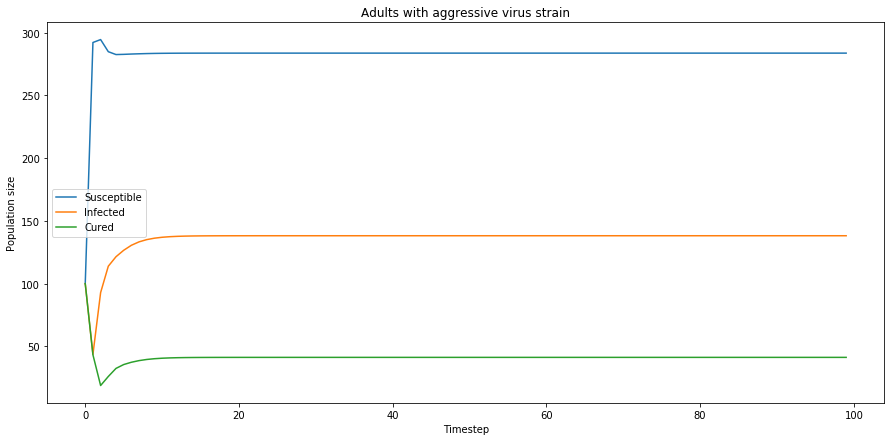

In [9]:
matplotlib.rcParams['figure.figsize'] = [15, 7]
plt.xlabel('Timestep')
plt.ylabel('Population size')
plt.title('Adults with aggressive virus strain')
plt.plot([get_s(0, x) for x in range(100)], label='Susceptible')
plt.plot([get_i(0, 0, x) for x in range(100)], label='Infected')
plt.plot([get_r(0, 0, x) for x in range(100)], label='Cured')
plt.legend()

#### As can be noted, the ebola virus has a high succeptibility rate for older people, but only arround half of them get infected and die. On the other hand the cured population drops almost to cero and remains very low for this case.

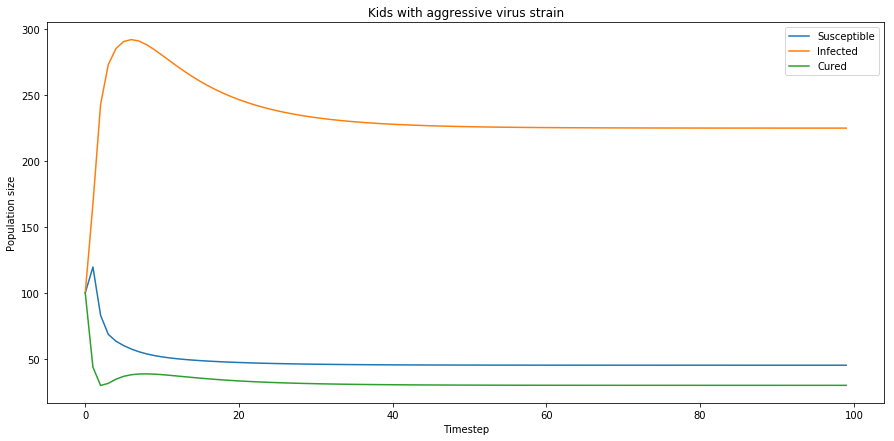

In [10]:
matplotlib.rcParams['figure.figsize'] = [15, 7]
plt.xlabel('Timestep')
plt.ylabel('Population size')
plt.title('Kids with aggressive virus strain')
plt.plot([get_s(1, x) for x in range(100)], label='Susceptible')
plt.plot([get_i(1, 0, x) for x in range(100)], label='Infected')
plt.plot([get_r(1, 0, x) for x in range(100)], label='Cured')
plt.legend()

##### When testing a children population with the agressive virus strain case we can notice how the high probability for children to get infected and the high rate of mortality of the Strain lead to the death in many cases decreasing the population by arround a 1/3, and droping the  cure and succeptible chances to almost cero.

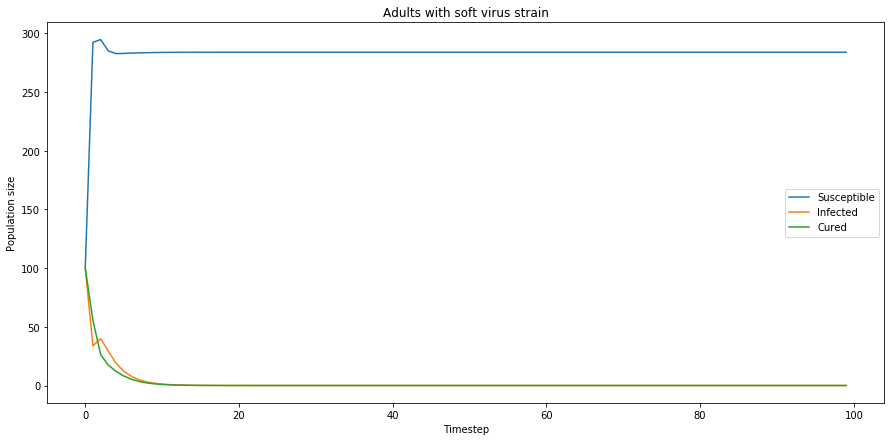

In [11]:
matplotlib.rcParams['figure.figsize'] = [15, 7]
plt.xlabel('Timestep')
plt.ylabel('Population size')
plt.title('Adults with soft virus strain')
plt.plot([get_s(0, x) for x in range(100)], label='Susceptible')
plt.plot([get_i(0, 1, x) for x in range(100)], label='Infected')
plt.plot([get_r(0, 1, x) for x in range(100)], label='Cured')
plt.legend()

#### When the second strain was initially tested with adults, which responded very well to the flu virus with death rates close to 0, even though their succeptibility rate is really high they can recover quite easily.

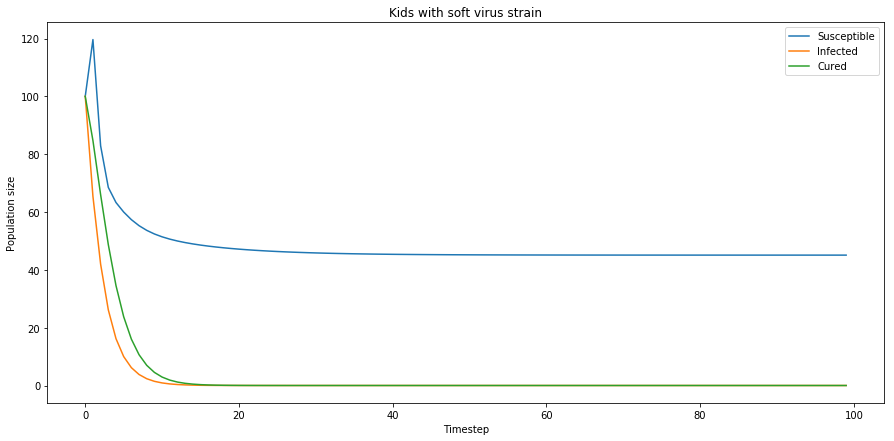

In [12]:
matplotlib.rcParams['figure.figsize'] = [15, 7]
plt.xlabel('Timestep')
plt.ylabel('Population size')
plt.title('Kids with soft virus strain')
plt.plot([get_s(1, x) for x in range(100)], label='Susceptible')
plt.plot([get_i(1, 1, x) for x in range(100)], label='Infected')
plt.plot([get_r(1, 1, x) for x in range(100)], label='Cured')
plt.legend()

#### Even though children are highly succeptible to being infected, in the case of the soft strain(flu) barely any children are still infected after a short period of time and only arround half of the population is still succeptible to getting the virus.

### Conclusion

##### Continous and discrete event system simulation has proven to be a great way to understand the causes and effects of many "common" events  found all arround us. With a very interesting case such as virus propagation we can find awnsers to how the population could react to different settings created by a known pathogen and help us look for a solution in order to prevent loss.
##### It is very interesting to see how the three states(Succeptible, Infected, Recovered) for each case was affected by the diferent probabilities of being hit by the virus and the strength of it, or recovering from it which changed depending on the age of the host.